<a href="https://colab.research.google.com/github/dhvanithakkar/Synapse/blob/week4/SynapseWeekFour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
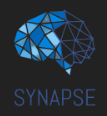

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [5]:
#write code here
titanic_train = pd.read_csv("/content/drive/MyDrive/Synapse/titanic_train.csv")
titanic_test = pd.read_csv("/content/drive/MyDrive/Synapse/titanic_test.csv")

In [6]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [8]:
import re

name = "Myles, Mr. Thomas Francis"

def extract_title(text):
    match = re.search(r',\s*(\w+\.)', text)
    if match:
        return match.group(1)
    else:
        return None

print(extract_title(name))

Mr.


In [9]:
# try researching about regex
titanic_train['Title'] = titanic_train['Name'].apply(extract_title)
titanic_test['Title'] = titanic_test['Name'].apply(extract_title)


In [10]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [11]:
#write code here
titanic_train.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)
titanic_test.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)


In [12]:
titanic_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,34.5,0,0,7.8292,NaN,Q,Mr.
1,3,female,47.0,1,0,7.0000,NaN,S,Mrs.
2,2,male,62.0,0,0,9.6875,NaN,Q,Mr.
3,3,male,27.0,0,0,8.6625,NaN,S,Mr.
4,3,female,22.0,1,1,12.2875,NaN,S,Mrs.
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S,Mr.
414,1,female,39.0,0,0,108.9000,C105,C,Dona.
415,3,male,38.5,0,0,7.2500,NaN,S,Mr.
416,3,male,NaN,0,0,8.0500,NaN,S,Mr.


### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [13]:
#write code here
import pandas as pd
nan_percentage_train = (titanic_train.isnull().sum() / len(titanic_train)) * 100

nan_df_train = pd.DataFrame({'Column': titanic_train.columns, 'NaN Percentage': nan_percentage_train})

nan_df_train


,Column,NaN Percentage
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377
Embarked,Embarked,0.224467
Title,Title,0.112233


*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [14]:
#write code here
import pandas as pd
nan_percentage_test = (titanic_test.isnull().sum() / len(titanic_test)) * 100

nan_df_test = pd.DataFrame({'Column': titanic_test.columns, 'NaN Percentage': nan_percentage_test})

nan_df_test


,Column,NaN Percentage
Pclass,Pclass,0.000000
Sex,Sex,0.000000
Age,Age,20.574163
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Fare,Fare,0.239234
Cabin,Cabin,78.229665
Embarked,Embarked,0.000000
Title,Title,0.000000


In [15]:
#write code here

titanic_test = titanic_test.fillna(titanic_test.mean())
titanic_test

<ipython-input-15-c12b6acb0999>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_test = titanic_test.fillna(titanic_test.mean())


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,male,34.50000,0,0,7.8292,NaN,Q,Mr.
1,3,female,47.00000,1,0,7.0000,NaN,S,Mrs.
2,2,male,62.00000,0,0,9.6875,NaN,Q,Mr.
3,3,male,27.00000,0,0,8.6625,NaN,S,Mr.
4,3,female,22.00000,1,1,12.2875,NaN,S,Mrs.
...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,NaN,S,Mr.
414,1,female,39.00000,0,0,108.9000,C105,C,Dona.
415,3,male,38.50000,0,0,7.2500,NaN,S,Mr.
416,3,male,30.27259,0,0,8.0500,NaN,S,Mr.


In [16]:
titanic_test.drop('Cabin', axis=1, inplace=True)
titanic_train.drop('Cabin', axis=1, inplace=True)

In [17]:
titanic_train = titanic_train.fillna(titanic_train.mean())
titanic_train

<ipython-input-17-d0363e3034a4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_train = titanic_train.fillna(titanic_train.mean())


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.000000,1,0,7.2500,S,Mr.
1,1,1,female,38.000000,1,0,71.2833,C,Mrs.
2,1,3,female,26.000000,0,0,7.9250,S,Miss.
3,1,1,female,35.000000,1,0,53.1000,S,Mrs.
4,0,3,male,35.000000,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Rev.
887,1,1,female,19.000000,0,0,30.0000,S,Miss.
888,0,3,female,29.699118,1,2,23.4500,S,Miss.
889,1,1,male,26.000000,0,0,30.0000,C,Mr.


### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [18]:
#write code here
titanic_test['Family_members'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_train['Family_members'] = titanic_train['SibSp'] + titanic_train['Parch']


In [19]:
#Normalize the columns ("Age", "Fare", "Family_members")
for col in ['Age', 'Fare', 'Family_members']:
    titanic_test[col] = (titanic_test[col]-titanic_test[col].min())/(titanic_test[col].max()-titanic_test[col].min())
    titanic_train[col] = (titanic_train[col]-titanic_train[col].min())/(titanic_train[col].max()-titanic_train[col].min())


In [20]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
titanic_train = pd.get_dummies(data = titanic_train, columns=['Pclass','Sex','Title','Embarked'])
titanic_test = pd.get_dummies(data = titanic_test, columns=['Pclass','Sex','Title','Embarked'])


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [21]:
#write code here
y_label_train = titanic_train['Survived']
print(titanic_train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


<b>remove the y_label (survived) from the dataframe</b>

In [22]:
#write code here
titanic_train.drop('Survived', axis=1, inplace=True)


Here, i thought to use the train and test data as it is, but since test data does not have survivors labels, I will just use the training data by splitting it. (Itni mehnat waste hui :(  )

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [23]:
#write code here
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_train,y_label_train, test_size=0.3, random_state=0)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [24]:
#write code here
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier(random_state = 10)
dec_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [25]:
dec_tree_model.score(x_train, y_train)

0.9823434991974318

In [26]:
dec_tree_predictions=dec_tree_model.predict(x_test)

<b>Print the Model Accuracy</b>

In [27]:
#write code here
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=dec_tree_predictions)
print(r2)
from sklearn.metrics import accuracy_score
print(f"{accuracy_score(y_test, dec_tree_predictions): .3f}")

-0.052857142857142936
 0.754


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans: Planning the next vacation can be challenging. Vacations are never long enough, there are budget constraints, and sometimes the extended family wants to come along, which makes logistics more complicated.

We can ask for a second opinion from an algorithm, when it is time to make a decision that involves way too many variables to keep track of. Picking a vacation destination is a great application.

Whenever we start planning a vacation, we always take into account:

* Duration of the vacation,
* Personal budget,
* Weather forecast,
* If extended family is joining,
* If we are feeling adventurous and want to explore new places.

Since Decision Trees are said to mimic how humans make decisions, that is the algorithm used.

The bonus piece it that, in the end, we are able to visualize the decision tree and see how the algorithm picked the destination.



Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [28]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy = []
validation_accuracy = []

for depth in range(1,11):
    dec_tree_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    dec_tree_model.fit(x_train, y_train)
    train_accuracy.append(dec_tree_model.score(x_train, y_train))
    validation_accuracy.append(dec_tree_model.score(x_test, y_test))


In [29]:
print(train_accuracy)
print(validation_accuracy)

[0.7849117174959872, 0.8250401284109149, 0.8314606741573034, 0.8443017656500803, 0.8635634028892456, 0.8780096308186196, 0.8892455858747994, 0.9052969502407705, 0.9309791332263242, 0.9438202247191011]
[0.7761194029850746, 0.7985074626865671, 0.8059701492537313, 0.8059701492537313, 0.7910447761194029, 0.7985074626865671, 0.7835820895522388, 0.7910447761194029, 0.7835820895522388, 0.7723880597014925]


DecisionTreeClassifier(max_depth=3, random_state=10)

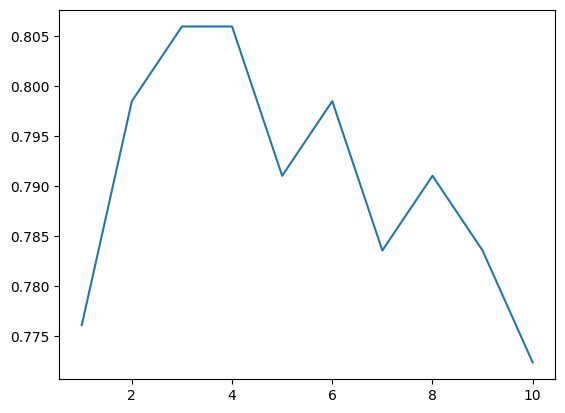

In [30]:
import matplotlib.pyplot as plt
depth = [i for i in range(1,11)]
plt.plot(depth, validation_accuracy, label = 'Accuracy')
dec_tree_model = DecisionTreeClassifier(max_depth = 3, random_state = 10)
dec_tree_model.fit(x_train, y_train)


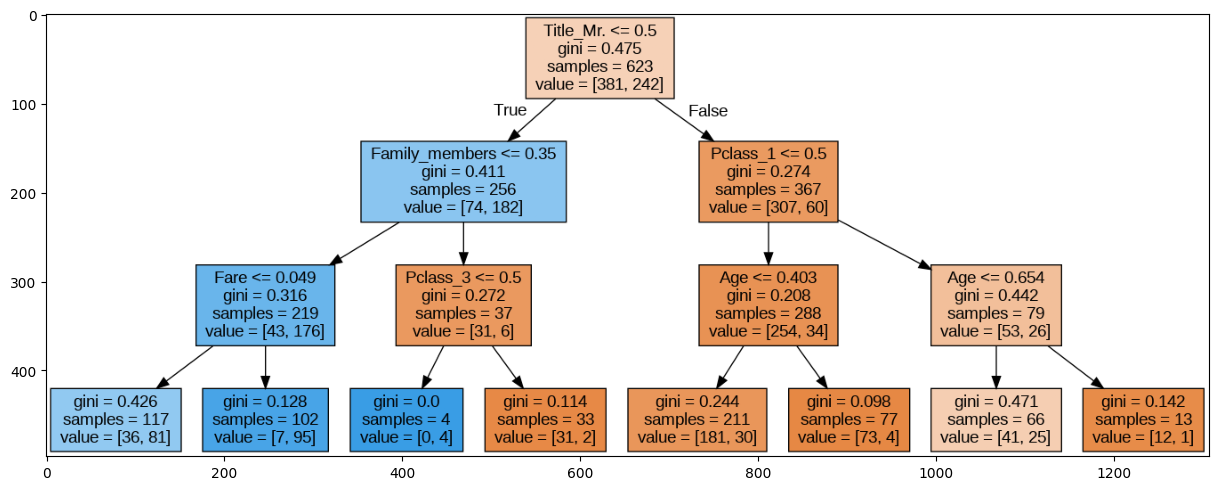

In [31]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dec_tree_model, out_file='tree.dot', feature_names=x_train.columns, max_depth=10, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [32]:
#write code here
print(dec_tree_model.score(x_train, y_train))
print(dec_tree_model.score(x_test, y_test))

0.8314606741573034
0.8059701492537313


## Explain: What is your understanding of the charts you made above?

Ans: If the passenger is:

An adult male, has less family onboard, has a lower ticket fare and bought third class tickets, the passenger is likely to not have survived

but if the passenger is:

Not male, a child, has a first class ticket then they are likely to have survived

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [33]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)


GaussianNB()

In [34]:
print(nb_classifier.score(x_train, y_train))
print(nb_classifier.score(x_test, y_test))

0.6340288924558587
0.6567164179104478


In [35]:
nb_pred  = nb_classifier.predict(x_test)
r2nb = r2_score(y_true=y_test, y_pred=nb_pred)
print(r2nb)
print(f"{accuracy_score(y_test, nb_pred): .3f}")

-0.4676190476190476
 0.657


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:Decision tree vs naive Bayes :

* Decision tree is a **discriminative** model (puts in one of the classes), whereas Naive bayes is a **generative** model (finds probability of belonging in each of classes and then selects the highest).
* Decision trees are more **flexible** and easy.
* Decision tree **pruning** may neglect some key values in training data, which can lead the accuracy for a toss.
* Naive Bayes classifiers are not prone to **overfitting** (whereas Decision trees are), as they “ignore” irrelevant features, but they are prone to poisoning, which happens when we try to predict a class Ci but features uncommon to Ci appear, causing a misclassification.
* If the **features** independent from each other and seem equally important: Naive Bayes.
If features have to be cherry-picked: Decision Trees



## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [36]:
#write code here
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))
rf_pred  = rf.predict(x_test)
r2rf = r2_score(y_true=y_test, y_pred=rf_pred)
print()
print(r2rf)
print(f"{accuracy_score(y_test, rf_pred): .3f}")

0.9823434991974318
0.8022388059701493

0.1545238095238095
 0.802


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans: The success of a random forest highly depends on using uncorrelated decision trees. If we use same or very similar trees, overall result will not be much different than the result of a single decision tree.

## Extra - BaggingClassifier

In [37]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
n_estimators = [10,30,50,70,80,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators,

        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

bagging_grid = grid.best_estimator_

print(bagging_grid.score(x_train, y_train))
print(bagging_grid.score(x_test, y_test))
bag_grid_pred  = bagging_grid.predict(x_test)
r2bg = r2_score(y_true=y_test, y_pred=bag_grid_pred)
print()
print(r2bg)
print(f"{accuracy_score(y_test, bag_grid_pred): .3f}")

0.7967914438502673
{'n_estimators': 70}
BaggingClassifier(base_estimator=None, n_estimators=70)
0.9823434991974318
0.8395522388059702

0.314047619047619
 0.840


## Explain: What is the difference between Random Forest and Bagging Classifier?

Ans:

*   In Random Forest, not all features(independent variables) are selected in a subset.

*   Random Forest works only with Decision Trees, Whereat in bagging any algorithm can be used.

*   In bagging the subsets differ from original data only in terms of number of rows but in Random forest the subsets differ from the original data both in terms of number of rows as well as number of columns. Thus making it an even more optimized approach of using Decision Trees for than bagging.

*   Since the all the subsets in bagging share the same columns hence, the models created from them are also correlated and a strong variable overpowers all models. Random forest checks this tendency by randomly selecting a subset of columns, and during aggregation the polarity caused is averaged out. Thus there is better learning and more accurate predictions.



### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [38]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1)
ada_model = ada.fit(x_train, y_train)

ada_pred = ada_model.predict(x_test)
print(f"{accuracy_score(y_test, ada_pred)}")

0.8134328358208955


## Explain: What is the difference between Bagging and Boosting?

Ans:
*   Bagging is a method of merging the same type of predictions. Boosting is a method of merging different types of predictions.

*   Bagging decreases variance, not bias, and solves over-fitting issues in a model. Boosting decreases bias, not variance.

*   In Bagging, each model receives an equal weight. In Boosting, models are weighed based on their performance.

*   Models are built independently in Bagging. New models are affected by a previously built model’s performance in Boosting.

*   In Bagging, training data subsets are drawn randomly with a replacement for the training dataset. In Boosting, every new subset comprises the elements that were misclassified by previous models.

*   Bagging is usually applied where the classifier is unstable and has a high variance. Boosting is usually applied where the classifier is stable and simple and has high bias.






### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [39]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [40]:
pruning_tree = gcv.best_estimator_
pruning_tree.fit(x_train,y_train)
y_train_pred = pruning_tree.predict(x_train)
y_test_pred = pruning_tree.predict(x_test)


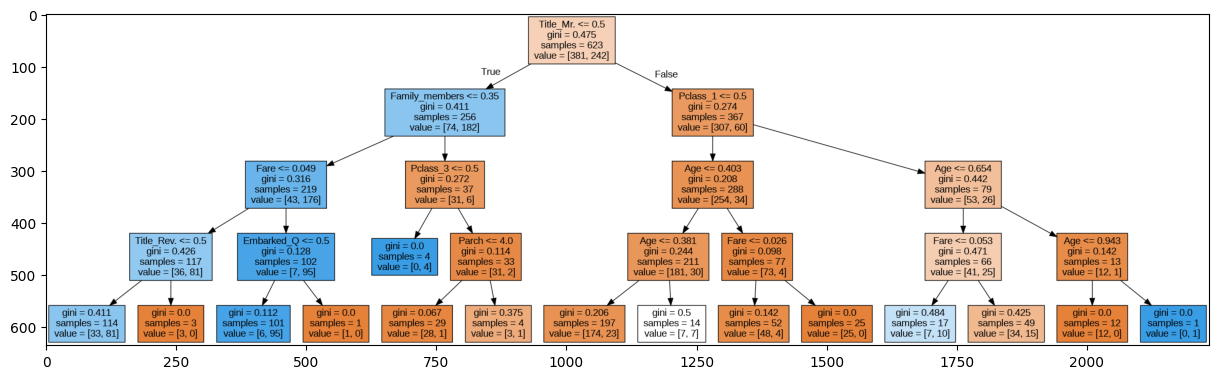

In [41]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
#complete the code below to create an image of the decision tree
print_tree = tree.export_graphviz(pruning_tree, out_file='tree.dot', feature_names=x_train.columns, max_depth=10, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

[0.         0.00016051 0.00018344 0.00019109 0.00024077 0.00038122
 0.00040128 0.00042804 0.00053505 0.00053505 0.00077825 0.00080257
 0.00080257 0.00086163 0.00086363 0.00096308 0.00096308 0.00106652
 0.00107009 0.00107039 0.00108347 0.00118196 0.00120385 0.0012606
 0.00126404 0.00131329 0.00142679 0.00150786 0.00151825 0.0015287
 0.00156907 0.00160216 0.00160514 0.00162135 0.00166464 0.00184185
 0.00196056 0.0020429  0.00214018 0.00214018 0.00224719 0.00234401
 0.00248147 0.00275166 0.00284046 0.0029011  0.00290453 0.00294275
 0.00296333 0.00369072 0.00381891 0.00402004 0.00449108 0.00473743
 0.00556737 0.00886545 0.00999805 0.01010671 0.04181467 0.14509367]


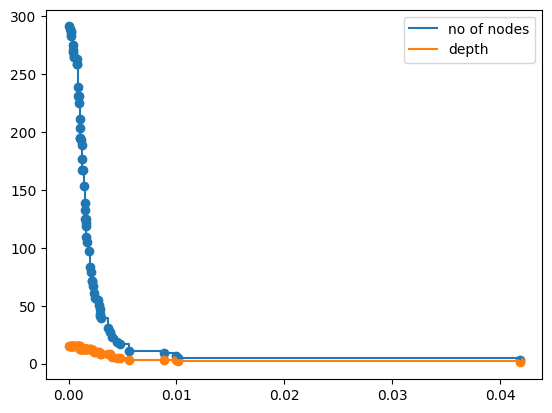

In [42]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()


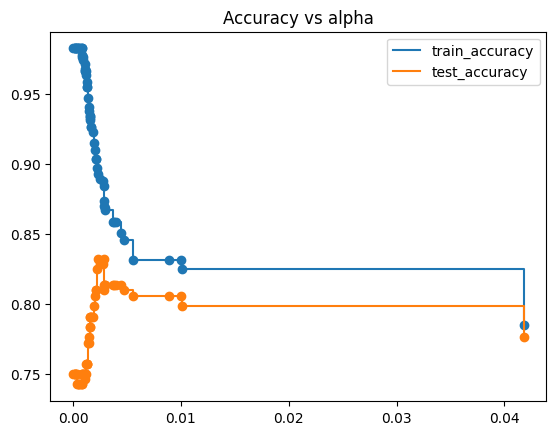

In [43]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()


In [44]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')


Train score 0.8250401284109149
Test score 0.7985074626865671


In [47]:
alpha = 0.002
max_alpha = 0
max_alpha_score = 0
while alpha <=0.02:
    clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clf_.fit(x_train,y_train)
    y_train_pred = clf_.predict(x_train)
    y_test_pred = clf_.predict(x_test)
    print(f"Alpha: {alpha}")
    print(f'Train score {accuracy_score(y_train_pred,y_train)}')
    print(f'Test score {accuracy_score(y_test_pred,y_test)}')
    if max_alpha_score<accuracy_score(y_test_pred,y_test):
        max_alpha = alpha
        max_alpha_score = accuracy_score(y_test_pred,y_test)
    alpha += 0.002
print(max_alpha, max_alpha_score)

Alpha: 0.002
Train score 0.9149277688603531
Test score 0.7985074626865671
Alpha: 0.004
Train score 0.8587479935794543
Test score 0.8134328358208955
Alpha: 0.006
Train score 0.8314606741573034
Test score 0.8059701492537313
Alpha: 0.008
Train score 0.8314606741573034
Test score 0.8059701492537313
Alpha: 0.01
Train score 0.8314606741573034
Test score 0.8059701492537313
Alpha: 0.012
Train score 0.8250401284109149
Test score 0.7985074626865671
Alpha: 0.014
Train score 0.8250401284109149
Test score 0.7985074626865671
Alpha: 0.016
Train score 0.8250401284109149
Test score 0.7985074626865671
Alpha: 0.018000000000000002
Train score 0.8250401284109149
Test score 0.7985074626865671
0.004 0.8134328358208955


In [48]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.004)
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)
print(f"Alpha: {alpha}")
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Alpha: 0.020000000000000004
Train score 0.8587479935794543
Test score 0.8134328358208955


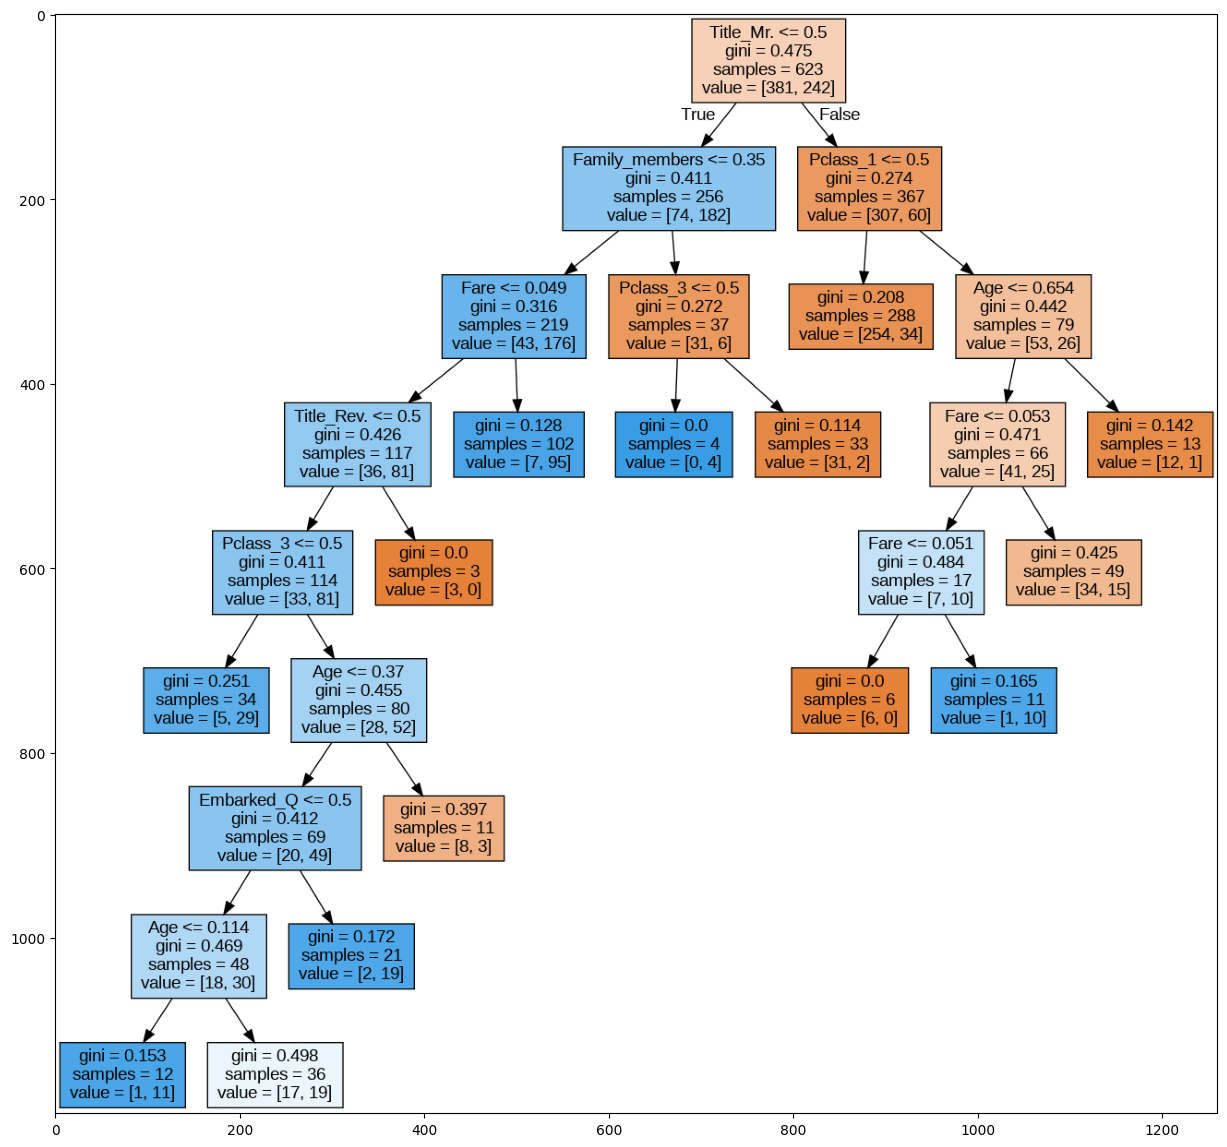

In [49]:
print_tree = tree.export_graphviz(clf_, out_file='tree.dot', feature_names=x_train.columns, max_depth=10, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans: Bagging Classifier got the best accuracy on this dataset so that is the one I will choose


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024